# Binary Joint Use Case (Single DataFrameCase)

In this vignette a use case of the Binary Channel Entropy Triangle is presented. We are going to evaluate different multiclass-classification scenarios in order to analyze the data.
The main functionalities for the classification of the database will be extracted from: https://www.geeksforgeeks.org/multiclass-classification-using-scikit-learn/

### Importing Libraries

As the functions for the entopies measures are stored in other domain, first we will need to access those modules with the functions and the import all the necessary functions

In [262]:
# Bring your packages onto the path
import sys,os
sys.path.append(os.path.abspath(os.path.join('..'))) #'entropytriangle main directory

In [263]:
from entropytriangle import * #importing all modules necessary for the plotting

## Download the databases

In [264]:
#df = pd.read_csv('Arthitris.csv',delimiter=',',index_col='Unnamed: 0')
#df = pd.read_csv('Breast_data.csv',delimiter=',',index_col='Unnamed: 0').drop(['Sample code number'],axis = 1).replace('?',np.nan) # in this DB the missing values are represented as '?' 
#df = pd.read_csv('Glass.csv',delimiter=',')
#df = pd.read_csv('Ionosphere.csv',delimiter=',')
df = pd.read_csv('Iris.csv',delimiter=',',index_col='Id')
#df = pd.read_csv('Wine.csv',delimiter=',').drop(['Wine'],axis = 1)

In [265]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [266]:
df = df.fillna(0)
df.head(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


### Prepare the data for the classification (Features - Classes) 

We are going to load the train_test_split that will allow us to separe automatically the data in a train/test sets. Additionally, we are going to import the contingency matrix that will allow us to calculate the joint entropy matrix of the classifier

In [267]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

Separating the data farmes features and classes

In [270]:
X = df[df.columns[df.columns != 'Species']]
y = df['Species']

We are now to define some classificators for evaluating their performance with the BreastCancer database

In [271]:
# dividing X, y into train and test data
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 0)

# KNN

### KNN - Classifier (Don´t run the code if you want to implement other classifier)

Downloading the sklearn Knn classifier and fitting it into our data

In [272]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

Once we have design our classifier, we are going to evaluate the accuracy

In [273]:
print(knn.score(X_test, y_test))

0.9736842105263158


Finally, we will compute the confusion matrix of the classified data

In [274]:
knn_predictions = knn.predict(X_test) 
cm = confusion_matrix(y_test, knn_predictions)
cm

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]])

### KNN - Channel Bivariate Entropy Triangle Plotting

The last step will be calculating the entropic measures for the contingency matrix and plot the entropy triangle. The coordinates will be calculated multiplying the normalized values needed by the scale used for plotting the triangle, and will appear behind the triangle plot for comparission

In [275]:
edf = jentropies_binary(cm)
#edf1 = jentropies(pd.DataFrame(y_test),pd.DataFrame(knn_predictions))

In [276]:
edf
#edf1

,H_U,H_P,DeltaH_P,M_P,VI_P
Type,,,,,
X,1.584963,1.547005,0.037957,1.423585,0.123420
Y,1.584963,1.565602,0.019360,1.423585,0.142017
XY,3.169925,3.112608,0.057317,2.847171,0.265437


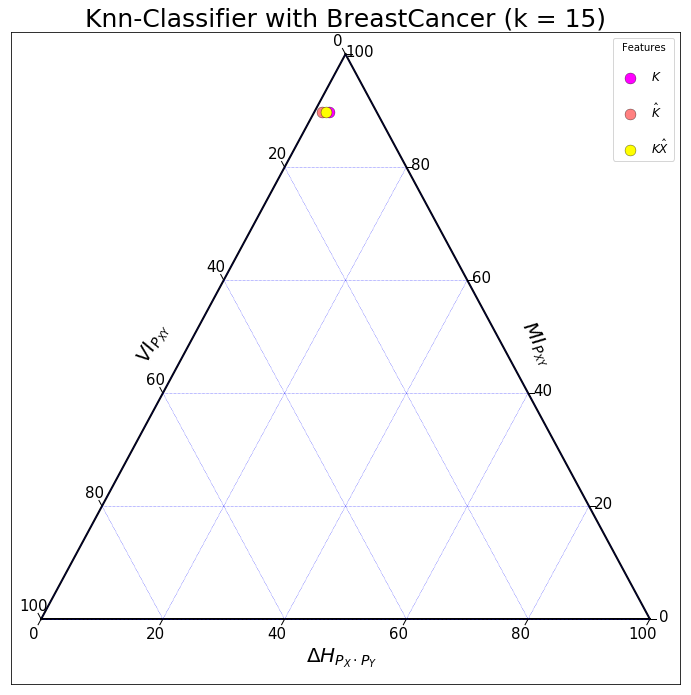

In [277]:
cbetplot(edf,s_mk=120, gridl = 20, pltscale=12 ,fonts = 20, ticks_size= 15,chart_title="Knn-Classifier with BreastCancer (k = 15)")

# Naive Bayes

### Naive Bayes - Classificator 

Download of the package needed and creation of the model

In [278]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_train, y_train)

Once we have design our classifier, we are going to evaluate the accuracy

In [279]:
print(gnb.score(X_test, y_test))

1.0


Finally, we will compute the confusion matrix of the classified data

In [280]:
gnb_predictions = gnb.predict(X_test)
cm = confusion_matrix(y_test, gnb_predictions)
cm

array([[13,  0,  0],
       [ 0, 16,  0],
       [ 0,  0,  9]])

### Naive Bayes - Channel Bivariate Entropy Triangle Plotting

The last step will be calculating the entropic measures for the contingency matrix and plot the entropy triangle. The coordinates will be calculated multiplying the normalized values needed by the scale used for plotting the triangle, and will appear behind the triangle plot for comparission

In [281]:
edf = jentropies_binary(cm)
#edf1 = jentropies(pd.DataFrame(y_test),pd.DataFrame(knn_predictions))

In [282]:
edf
#edf1

,H_U,H_P,DeltaH_P,M_P,VI_P
Type,,,,,
X,1.584963,1.547005,0.037957,1.547005,0.0
Y,1.584963,1.547005,0.037957,1.547005,0.0
XY,3.169925,3.094011,0.075914,3.094011,0.0


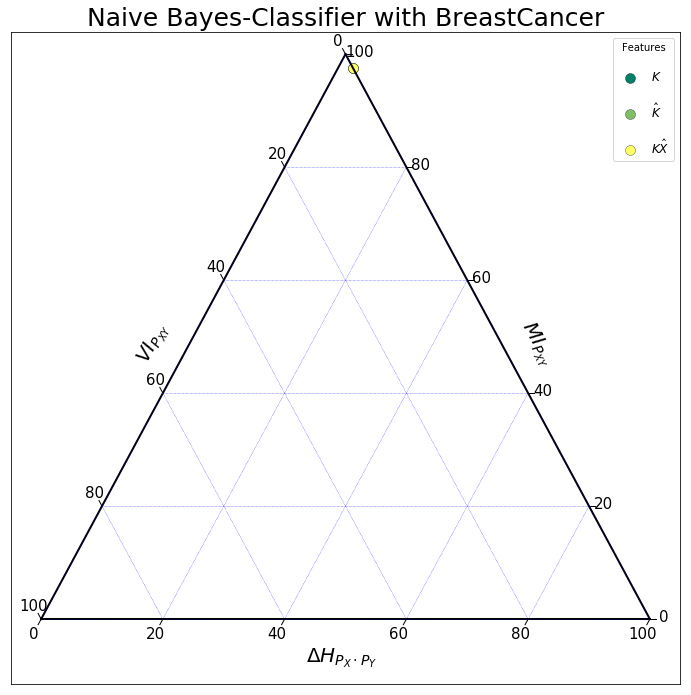

In [283]:
cbetplot(edf,s_mk=100, gridl = 20, pltscale=12 ,fonts = 20, ticks_size= 15,chart_title="Naive Bayes-Classifier with BreastCancer")